In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("master.csv")
display(data.shape)
data.head()

(27820, 12)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [26]:
data1 = data.drop(['country-year'], axis=1)

In [27]:
data1.shape

(27820, 11)

In [33]:
data1.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [28]:
data2 = pd.read_csv("who_suicide_statistics.csv")
display(data2.shape)
data2.head()

(43776, 6)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [29]:
merged = pd.merge(data1, data2, how='right')
display(merged.shape)
merged.head()

(43776, 11)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1985,female,15-24 years,NaN,277900.0,NaN,NaN,NaN,NaN,NaN
1,Albania,1985,female,25-34 years,NaN,246800.0,NaN,NaN,NaN,NaN,NaN
2,Albania,1985,female,35-54 years,NaN,267500.0,NaN,NaN,NaN,NaN,NaN
3,Albania,1985,female,5-14 years,NaN,298300.0,NaN,NaN,NaN,NaN,NaN
4,Albania,1985,female,55-74 years,NaN,138700.0,NaN,NaN,NaN,NaN,NaN


In [32]:
merged.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population             5460
suicides/100k pop     14072
HDI for year          33276
 gdp_for_year ($)     14072
gdp_per_capita ($)    14072
generation            14072
dtype: int64

In [31]:
merged = merged.drop(merged[merged['suicides_no'].isna()].index, axis=0)
merged = merged.reset_index(drop=True)
display(merged.shape)
merged.head()

(41520, 11)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,female,15-24 years,14.0,289700.0,4.83,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987,female,25-34 years,4.0,257200.0,1.56,NaN,"2,156,624,900",796.0,Boomers
2,Albania,1987,female,35-54 years,6.0,278800.0,2.15,NaN,"2,156,624,900",796.0,Silent
3,Albania,1987,female,5-14 years,0.0,311000.0,0.00,NaN,"2,156,624,900",796.0,Generation X
4,Albania,1987,female,55-74 years,0.0,144600.0,0.00,NaN,"2,156,624,900",796.0,G.I. Generation


In [34]:
merged = merged.drop(merged[merged['generation'].isna()].index, axis=0)
merged = merged.reset_index(drop=True)
display(merged.shape)
merged.head()

(27448, 11)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,female,15-24 years,14.0,289700.0,4.83,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987,female,25-34 years,4.0,257200.0,1.56,NaN,"2,156,624,900",796.0,Boomers
2,Albania,1987,female,35-54 years,6.0,278800.0,2.15,NaN,"2,156,624,900",796.0,Silent
3,Albania,1987,female,5-14 years,0.0,311000.0,0.00,NaN,"2,156,624,900",796.0,Generation X
4,Albania,1987,female,55-74 years,0.0,144600.0,0.00,NaN,"2,156,624,900",796.0,G.I. Generation


In [35]:
merged.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19204
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [36]:
data3 = pd.read_csv("HDI.csv")
display(data3.shape)
data3.head()

(195, 82)

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,...,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,...,8.0,4.3,0.921,1.9,0.921,17.7,0.753,6.0,1.4,34.9
2,2,3,Switzerland,2.0,0.939,83.1,13.4,56364.0,7.0,0.0,...,8.4,3.8,0.934,5.7,0.840,15.7,0.806,4.9,1.2,31.6
3,3,4,Germany,4.0,0.926,81.1,13.2,45000.0,13.0,0.0,...,7.0,3.7,0.905,2.6,0.891,14.8,0.787,4.6,1.1,30.1
4,4,5,Denmark,5.0,0.925,80.4,12.7,44519.0,13.0,2.0,...,7.0,3.8,0.894,3.0,0.896,14.3,0.789,4.5,1.0,29.1


In [38]:
cols = []
for i in range(len(data3.columns)):
    cols.append(data3.columns[i].lower())
data3.columns = cols

In [39]:
hdi = data3[['country','hdi']]
hdi.head()

,country,hdi
0,Norway,0.949
1,Australia,0.939
2,Switzerland,0.939
3,Germany,0.926
4,Denmark,0.925


In [40]:
hdi = hdi.sort_values(by=['country'], ascending=True).reset_index()

In [41]:
hdi = hdi.drop(['index'], axis=1)
hdi.head()

,country,hdi
0,Afghanistan,0.479
1,Albania,0.764
2,Algeria,0.745
3,Andorra,0.858
4,Angola,0.533


In [42]:
hdi["country"] = hdi["country"].replace({"Hong Kong, China (SAR)": "Hong Kong SAR","Iran, Islamic Rep.":"Iran (Islamic Rep of)","Kyrgyz Republic":"Kyrgyzstan","Macao SAR, China":"Macau","Korea, Rep.":"Republic of Korea","Moldova":"Republic of Moldova","Slovak Republic":"Slovakia","St. Kitts and Nevis":"Saint Kitts and Nevis","St. Lucia":"Saint Lucia","St. Vincent and the Grenadines":"Saint Vincent and Grenadines","Macedonia, FYR":"TFYR Macedonia","United States":"United States of America","Venezuela, RB":"Venezuela (Bolivarian Republic of)","Virgin Islands (U.S.)":"Virgin Islands (USA)"})

In [51]:
merged1 = pd.merge(data1, hdi, how='inner')
display(merged1.shape)
merged1.head()

(26224, 12)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,hdi
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,0.764
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,0.764
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,0.764
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,0.764
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,0.764


In [52]:
merged1.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          18064
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
hdi                      36
dtype: int64

In [53]:
merged1 = merged1.drop(merged1[merged1['hdi'].isna()].index, axis=0)
merged1 = merged1.reset_index(drop=True)
display(merged1.shape)

(26188, 12)

In [54]:
merged1['hdi_final'] =  np.where(merged1['HDI for year'].isna(), merged1['hdi'], merged1['HDI for year'])
merged1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,hdi,hdi_final
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,0.764,0.764
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,0.764,0.764
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,0.764,0.764
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,0.764,0.764
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,0.764,0.764


In [182]:
final_data = merged1.drop(['HDI for year','hdi'], axis=1)
display(final_data.shape)
final_data.head()

(26188, 11)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,hdi_final
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,0.764
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,0.764
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,0.764
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,0.764
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,0.764


In [183]:
final_data.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
hdi_final             0
dtype: int64

In [184]:
# final_data = final_data.rename(columns={'gdp_for_year ($) ':'gdp_for_year_$','gdp_per_capita ($)':'gdp_per_capita_$'})
final_data = final_data.rename(columns={'gdp_for_year ($)':'gdp_for_year_$'})

In [185]:
final_data['gdp_for_year_$'] = final_data['gdp_for_year_$'].str.replace(',', '').astype(float)

In [186]:
final_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year_$,gdp_per_capita ($),generation,hdi_final
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,0.764
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,0.764
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,0.764
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,0.764
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,0.764


In [187]:
final_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
gdp_for_year_$        float64
gdp_per_capita ($)      int64
generation             object
hdi_final             float64
dtype: object

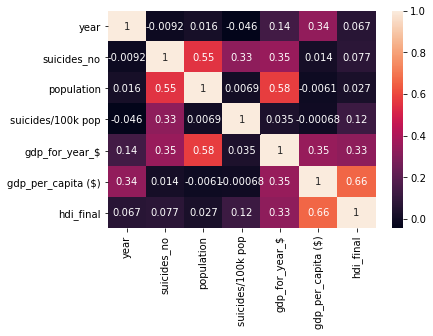

In [188]:
correlations_matrix = final_data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

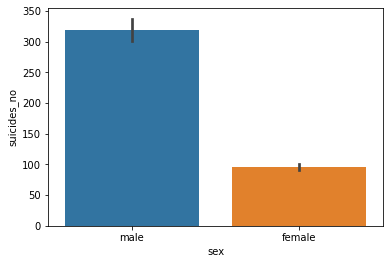

In [189]:
sns.barplot(x="sex", y="suicides_no", data=final_data)
plt.show()

In [190]:
print(final_data[final_data['sex']=="female"].shape)
print(final_data[final_data['sex']=="male"].shape)

(13094, 11)
(13094, 11)


In [215]:
display(p_c.sort_values('suicides/population', ascending=False).head(20))

,suicides_no,population,suicides/population
country,,,
Lithuania,28039,68085210,0.041182
Russian Federation,1209742,3690802620,0.032777
Sri Lanka,55641,182525626,0.030484
Belarus,59892,197372292,0.030345
Hungary,73891,248644256,0.029718
Latvia,12770,44852640,0.028471
Kazakhstan,101546,377513869,0.026899
Slovenia,10615,40268619,0.026360
Estonia,7034,27090810,0.025965


In [218]:
no_country = final_data[['country','suicides_no','population']]
# no_country['suicides/population'] = (no_country['suicides_no'].sum()/no_country['population'].sum())*100
# display(no_country.groupby('country').sum().sort_values('suicides_no', ascending=False).head())
p_c = no_country.groupby(['country']).agg({'suicides_no':'sum','population':'sum'}).reset_index()
p_c['suicides/population'] = (p_c['suicides_no']/p_c['population'])*100
display(p_c.head())


,country,suicides_no,population,suicides/population
0,Albania,1970,62325467,0.003161
1,Antigua and Barbuda,11,1990228,0.000553
2,Argentina,82219,1035985431,0.007936
3,Armenia,1905,77348173,0.002463
4,Australia,70111,542377786,0.012927


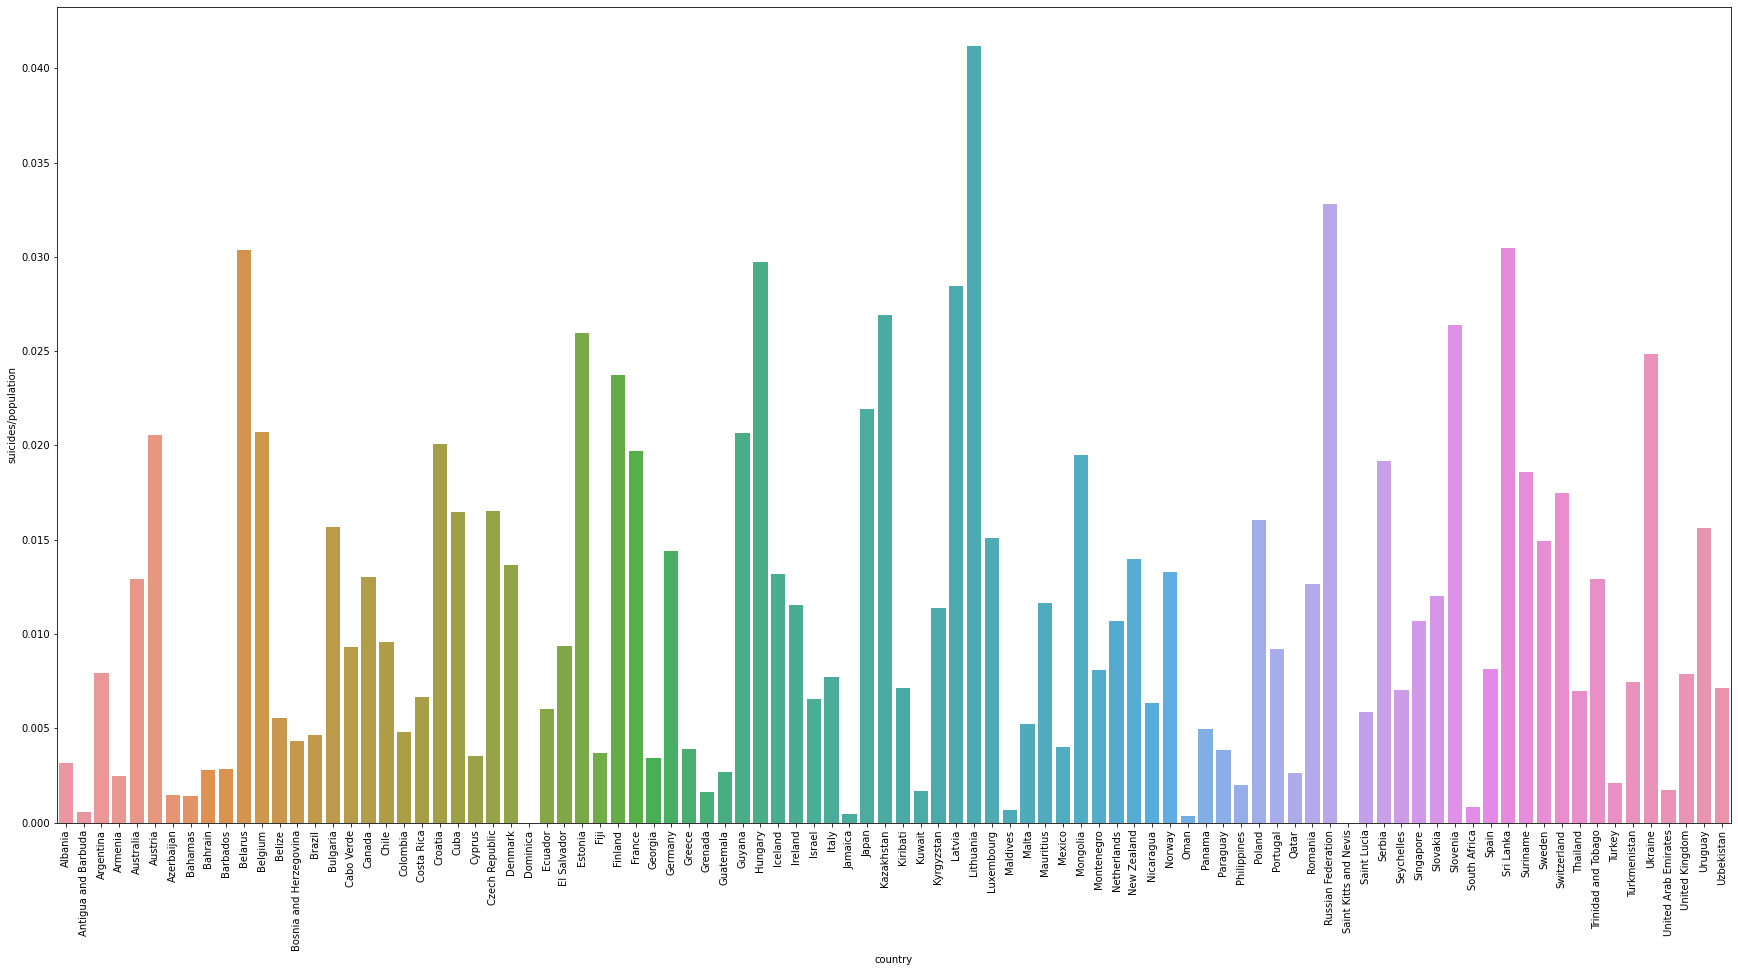

In [219]:
plt.figure(figsize=(30,15))
sns.barplot(x="country", y="suicides/population", data=p_c)
plt.xticks(rotation=90)
plt.show()
# p_c.plot(kind='bar', title='Suicides ratio per Countries', ylabel='suicides/population',
#          xlabel='country', figsize=(30,15))

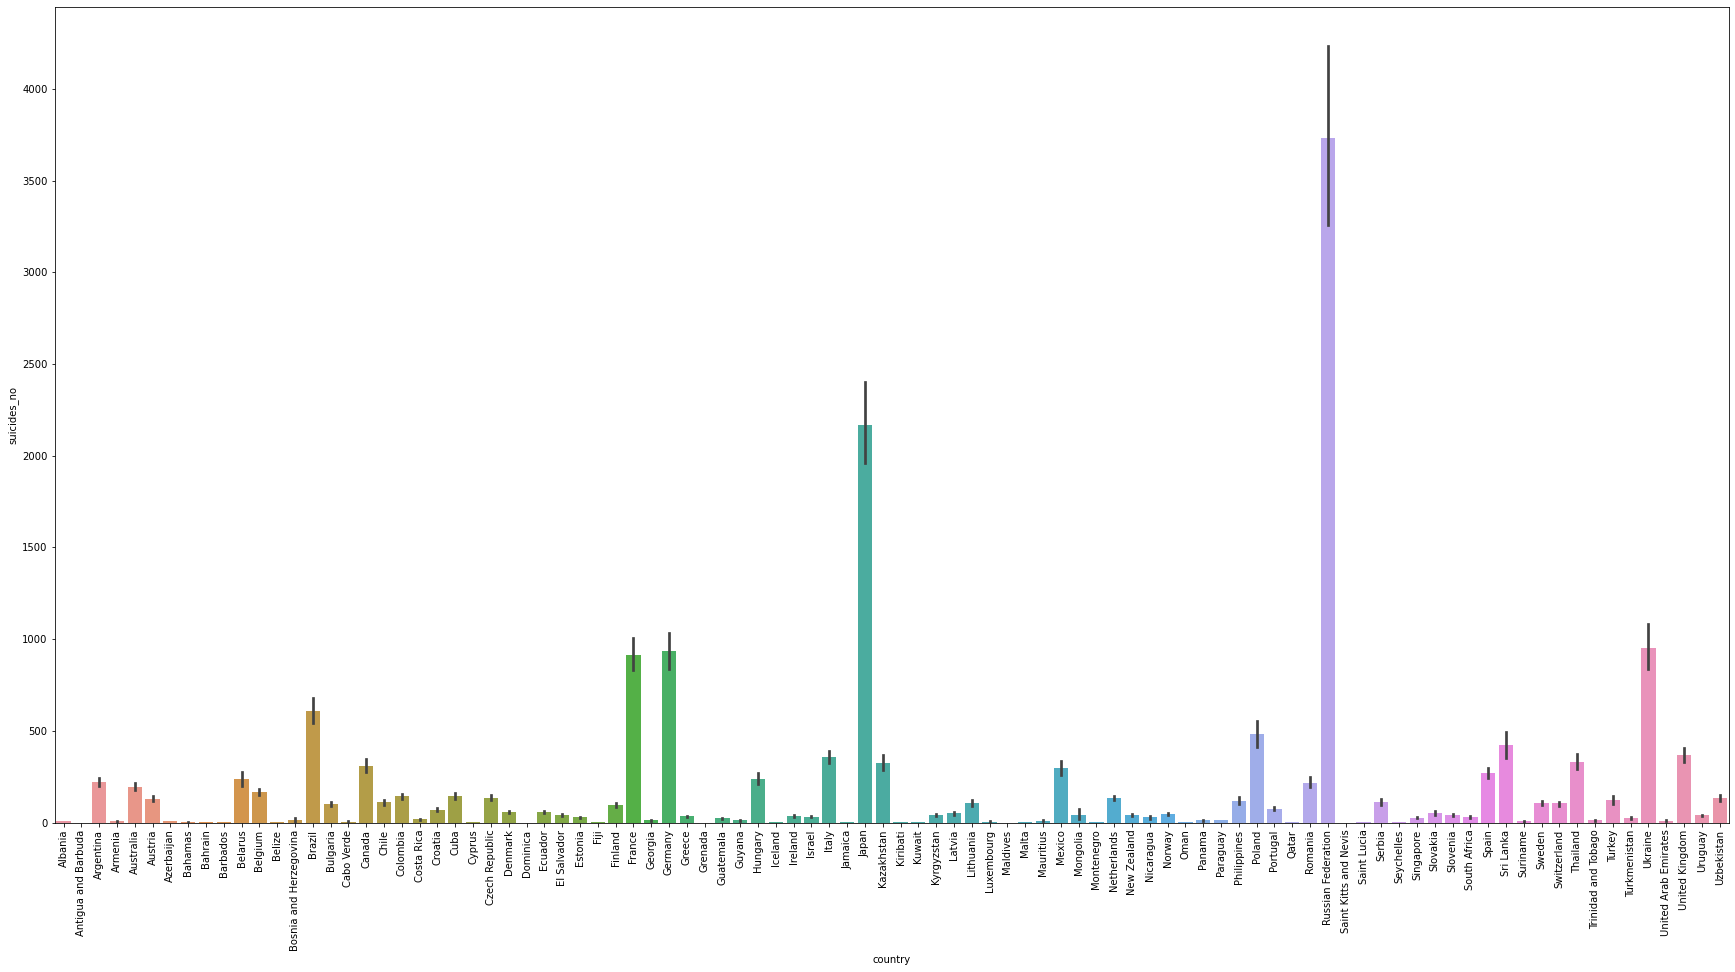

In [193]:
plt.figure(figsize=(30,15))
sns.barplot(x="country", y="suicides_no", data=final_data)
plt.xticks(rotation=90)
plt.show()

In [194]:
final_data['generation'] = pd.Categorical(final_data['generation'], categories = ['Silent','G.I. Generation','Boomers','Generation X','Millenials','Generation Z'], ordered=True)

In [203]:
no_generation.head()

,generation,suicides_no,population,suicides/population
0,Generation X,21,312900,0.006711
1,Silent,16,308000,0.005195
2,Generation X,14,289700,0.004833
3,G.I. Generation,1,21800,0.004587
4,Boomers,9,274300,0.003281


In [220]:
no_generation = final_data[['generation','suicides_no','population']]
# no_generation['suicides/population'] = (no_generation['suicides_no']/no_generation['population'])*100
# display(no_generation.groupby('generation').sum().sort_values('suicides_no', ascending=False).head())

p_g = no_generation.groupby(['generation']).agg({'suicides_no':'sum','population':'sum'}).reset_index()
p_g['suicides/population'] = (p_g['suicides_no']/p_g['population'])*100
display(p_g.head(6))

# p_g.plot(kind='bar', title='Suicides per Generations', ylabel='suicides/population',
#          xlabel='generation', figsize=(10,5))

,generation,suicides_no,population,suicides/population
0,Silent,1475088,7462033388,0.019768
1,G.I. Generation,412673,1624632599,0.025401
2,Boomers,1839894,10675103597,0.017235
3,Generation X,1206044,11071792698,0.010893
4,Millenials,497018,8894475314,0.005588
5,Generation Z,12661,2075639372,0.000610


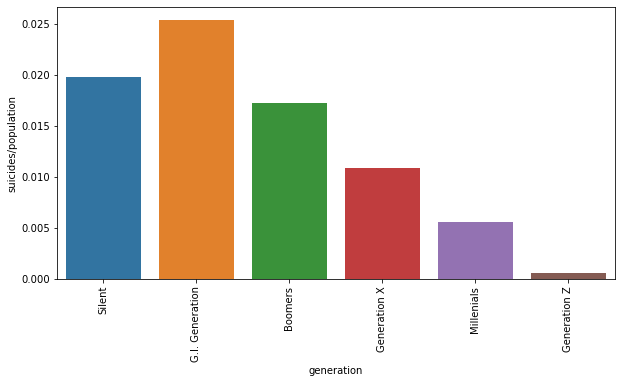

In [221]:
plt.figure(figsize=(10,5))
sns.barplot(x="generation", y="suicides/population", data=p_g)
plt.xticks(rotation=90)
plt.show()

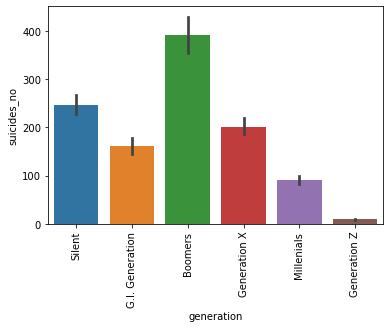

In [196]:
sns.barplot(x="generation", y="suicides_no", data=final_data)
plt.xticks(rotation=90)
plt.show()

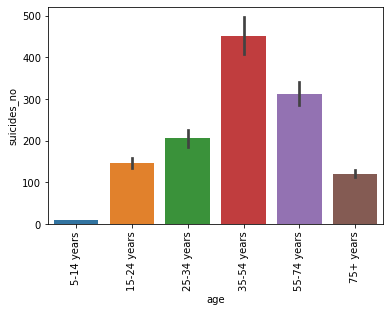

In [197]:
final_data['age'] = pd.Categorical(final_data['age'], categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'], ordered=True)
sns.barplot(x="age", y="suicides_no", data=final_data)
plt.xticks(rotation=90)
plt.show()

In [332]:
prep = final_data[['year','generation','suicides_no','population']]
silent = prep[(prep['year']==1990)&(prep['generation']=='Silent')]
G_I_Generation = prep[(prep['year']==1990)&(prep['generation']=='G.I. Generation')]
Boomers = prep[(prep['year']==1990)&(prep['generation']=='Boomers')]
Generation_X= prep[(prep['year']==1990)&(prep['generation']=='Generation X')]
Millenials = prep[(prep['year']==1990)&(prep['generation']=='Millenials')]
Generation_Z = prep[(prep['year']==1990)&(prep['generation']=='Generation Z')]
display(G_I_Generation.shape)
display(silent.shape)
display(Boomers.shape)
display(Generation_X.shape)
display(Millenials.shape)
display(Generation_Z.shape)

silent.head()

(240, 4)

(120, 4)

(120, 4)

(240, 4)

(0, 4)

(0, 4)

,year,generation,suicides_no,population
324,1990,Silent,1,5799
327,1990,Silent,0,5895
650,1990,Silent,439,3619000
655,1990,Silent,163,3622000
960,1990,Silent,25,332700


In [336]:
# p_c_s = p_c_s.groupby(['year']).agg({'suicides_no':'sum','population':'sum'}).reset_index()
silent['suicides/population'] = (silent['suicides_no']/silent['population'])*100
G_I_Generation['suicides/population'] = (G_I_Generation['suicides_no']/G_I_Generation['population'])*100
Boomers['suicides/population'] = (Boomers['suicides_no']/Boomers['population'])*100
Generation_X['suicides/population'] = (Generation_X['suicides_no']/Generation_X['population'])*100
Millenials['suicides/population'] = (Millenials['suicides_no']/Millenials['population'])*100
Generation_Z['suicides/population'] = (Generation_Z['suicides_no']/Generation_Z['population'])*100
silent.head()

<ipython-input-336-22f26006cd57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silent['suicides/population'] = (silent['suicides_no']/silent['population'])*100
<ipython-input-336-22f26006cd57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_I_Generation['suicides/population'] = (G_I_Generation['suicides_no']/G_I_Generation['population'])*100
<ipython-input-336-22f26006cd57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,year,generation,suicides_no,population,suicides/population
324,1990,Silent,1,5799,0.017244
327,1990,Silent,0,5895,0.000000
650,1990,Silent,439,3619000,0.012130
655,1990,Silent,163,3622000,0.004500
960,1990,Silent,25,332700,0.007514


In [259]:
# sample = p_c_s.sample(frac=2, replace= True, random_state=1)

In [312]:
p_gnew = p_g.groupby('generation')['suicides/population'].apply(list)
print(p_gnew)

generation
Silent               [0.01976790940619683]
G.I. Generation     [0.025401004525823872]
Boomers             [0.017235373720560998]
Generation X        [0.010892942388795438]
Millenials          [0.005587940631165599]
Generation Z       [0.0006099807206779079]
Name: suicides/population, dtype: object


In [337]:
silent1 = silent['suicides/population'].tolist()
G_I_Generation1 = G_I_Generation['suicides/population'].tolist()
Boomers1 = Boomers['suicides/population'].tolist()
Generation_X1 = Generation_X['suicides/population'].tolist()
Millenials1 = Millenials['suicides/population'].tolist()
Generation_Z1 = Generation_Z['suicides/population'].tolist()
print(silent1)

[0.01724435247456458, 0.0, 0.012130422768720641, 0.004500276090557703, 0.007514277126540426, 0.004189944134078212, 0.024723047824912185, 0.0063114906255801, 0.04240266913643617, 0.01523965887547573, 0.0069810999489187805, 0.0009408812921436413, 0.020833333333333336, 0.007692307692307693, 0.060780390195097546, 0.011213206665628406, 0.03283535636476813, 0.0147712833545108, 0.008849557522123894, 0.0, 0.007955957176478096, 0.002678231005309355, 0.020559000934500044, 0.007182228161015534, 0.02537896187413872, 0.008355433883708331, 0.013134328358208954, 0.0023960535588442564, 0.005231343337166233, 0.0012761132652611982, 0.017753623188405798, 0.002197802197802198, 0.04016036010690674, 0.01051451002383289, 0.007980663991244072, 0.0019244614903935412, 0.018954684264101934, 0.005030476302264553, 0.0663006177076184, 0.017558765222316624, 0.03874785001719986, 0.013666188373291727, 0.00713880100592196, 0.0032236793904315336, 0.029675297247261187, 0.010499958111869235, 0.005372945638432365, 0.001940

In [340]:
from scipy.stats import f_oneway
foneway = scipy.stats.f_oneway(silent1, G_I_Generation1, Boomers1, Generation_X1, axis=0)

In [341]:
print(foneway)

F_onewayResult(statistic=36.154117471746645, pvalue=9.184376734603714e-22)


In [343]:
prep1 = final_data[['year','country','suicides_no','population']]
# silent = prep[(prep['year']==1990)&(prep['generation']=='Silent')]
prep1['suicides/population'] = (prep1['suicides_no']/prep1['population'])*100
prep1.head()

<ipython-input-343-978ae45f4e5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep1['suicides/population'] = (prep1['suicides_no']/prep1['population'])*100


,year,country,suicides_no,population,suicides/population
0,1987,Albania,21,312900,0.006711
1,1987,Albania,16,308000,0.005195
2,1987,Albania,14,289700,0.004833
3,1987,Albania,1,21800,0.004587
4,1987,Albania,9,274300,0.003281


In [346]:
countries = prep1.groupby('country')['suicides/population'].apply(list)
print(countries)

country
Albania                 [0.006711409395973153, 0.005194805194805195, 0...
Antigua and Barbuda     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Argentina               [0.05564738292011019, 0.0242864296444667, 0.01...
Armenia                 [0.007514277126540426, 0.007434944237918216, 0...
Australia               [0.030593607305936073, 0.027480563467015627, 0...
                                              ...                        
Ukraine                 [0.07727550397067807, 0.052948584569895416, 0....
United Arab Emirates    [0.0038775900224069307, 0.0028771458712956747,...
United Kingdom          [0.02194809276062113, 0.017697872367586548, 0....
Uruguay                 [0.0788912579957356, 0.03604749787955895, 0.01...
Uzbekistan              [0.02299389957766307, 0.019539533474704635, 0....
Name: suicides/population, Length: 94, dtype: object


In [351]:
foneway_countries = scipy.stats.f_oneway(*countries, axis=0)

In [353]:
print(foneway_countries)

F_onewayResult(statistic=84.39714902911489, pvalue=0.0)


In [213]:
final_data.to_csv('suicides.csv')